In [120]:
import pandas as pd
import seaborn as sns

In [114]:
#Data Import from CSV using Pandas
df = pd.read_csv(r"C:\Users\dell\Desktop\Marvellous\Data_Analysis\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",encoding = 'unicode_escape')

In [115]:
df.shape

(11251, 15)

In [116]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [118]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# drop null values
df.dropna(inplace=True)

In [11]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df['Amount'] = df['Amount'].astype('int')

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


# Data Analysis :

## Gender wise Data Analysis

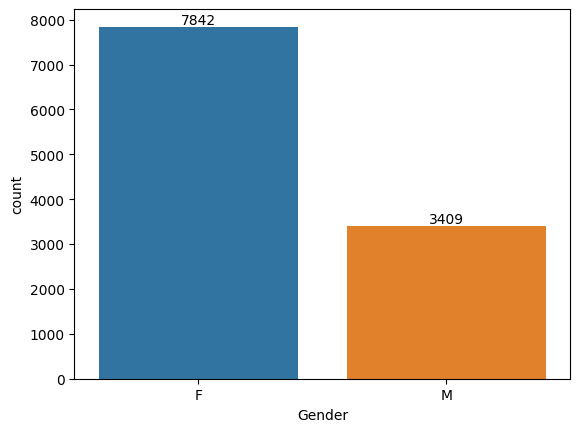

In [119]:
ax = sns.countplot(x='Gender',data = df)

for bar in ax.containers:
    ax.bar_label(bar)


As per the above Graphs, most of the buyers are females.

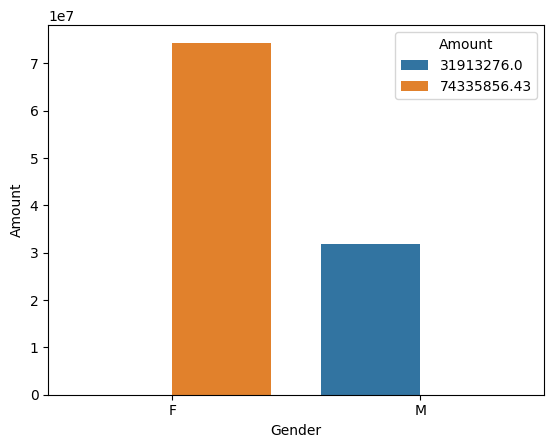

In [11]:
Sales_Gen = df.groupby(['Gender'], as_index=False)['Amount'].sum()

ar = sns.barplot(x='Gender',y = 'Amount',data = Sales_Gen, hue = 'Amount')


*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# Age wise Data Analysis

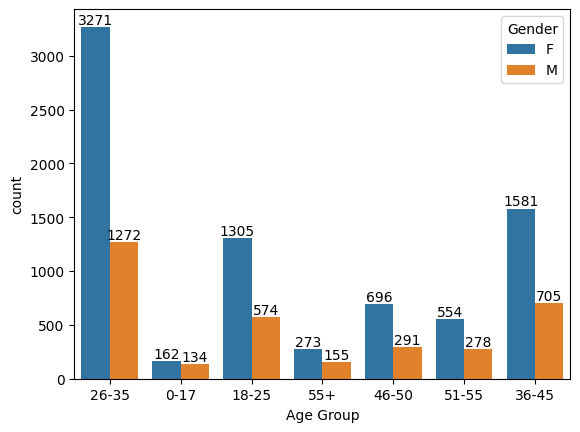

In [22]:
ax = sns.countplot(data = df,x='Age Group',hue='Gender')
for value in ax.containers:
    ax.bar_label(value)

In [39]:
df.groupby(['Age Group'],as_index=False)['Amount'].sum()

,Age Group,Amount
0,0-17,2699653.00
1,18-25,17240732.00
2,26-35,42613443.94
3,36-45,22144995.49
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00


<AxesSubplot: xlabel='Age Group', ylabel='Amount'>

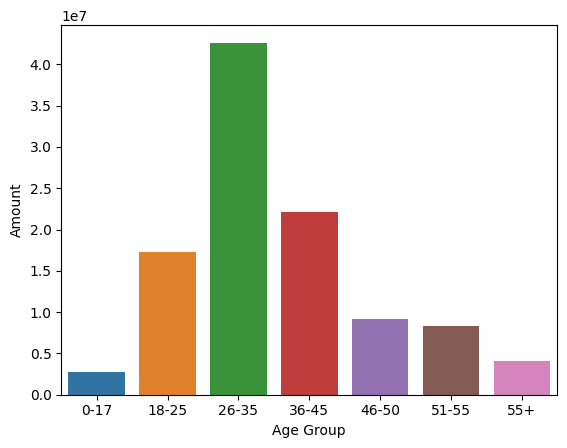

In [43]:
Sales_Age = df.groupby(['Age Group'],as_index=False)['Amount'].sum()

sns.barplot(x='Age Group',y='Amount',data = Sales_Age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

# State Wise Data Analysis

In [57]:
df.groupby(['State'],as_index=False)['Orders'].sum() 


,State,Orders
0,Andhra Pradesh,2054
1,Bihar,1062
2,Delhi,2744
3,Gujarat,1070
4,Haryana,1109
5,Himachal Pradesh,1568
6,Jharkhand,953
7,Karnataka,3241
8,Kerala,1137
9,Madhya Pradesh,2259


<AxesSubplot: xlabel='Orders', ylabel='State'>

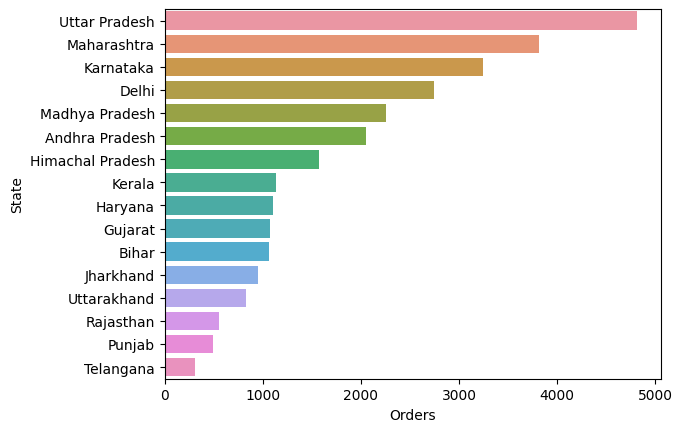

In [63]:
State_Wise_orders = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False)

sns.barplot(x='Orders',y='State',data = State_Wise_orders)

<AxesSubplot: xlabel='Amount', ylabel='State'>

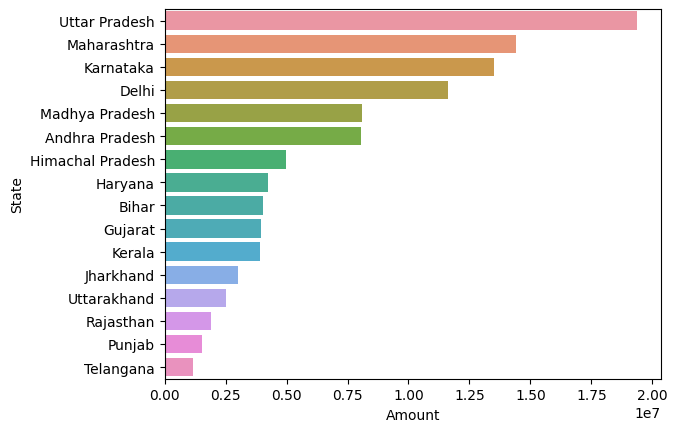

In [64]:
State_Wise_orders = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.barplot(x='Amount',y='State',data = State_Wise_orders)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


# Marital Status wise Data Analysis

In [81]:
df.groupby(['Marital_Status'], as_index = False)['Amount'].sum()

,Marital_Status,Amount
0,0,62125386.44
1,1,44123745.99


[[Text(0, 0, 'Married'), Text(1, 0, 'Unmarried')]]

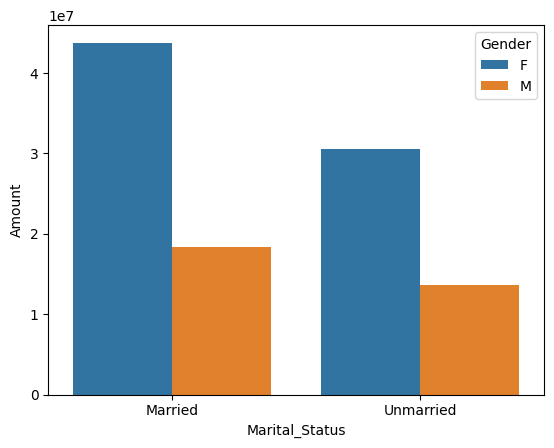

In [80]:
orders = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum()

obj = sns.barplot(x='Marital_Status',y='Amount',data = orders, hue='Gender')
obj.set(xticklabels = ['Married','Unmarried'])

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

# Occupation wise Data Analysis

In [88]:
df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(5)

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00


<AxesSubplot: xlabel='Amount', ylabel='Occupation'>

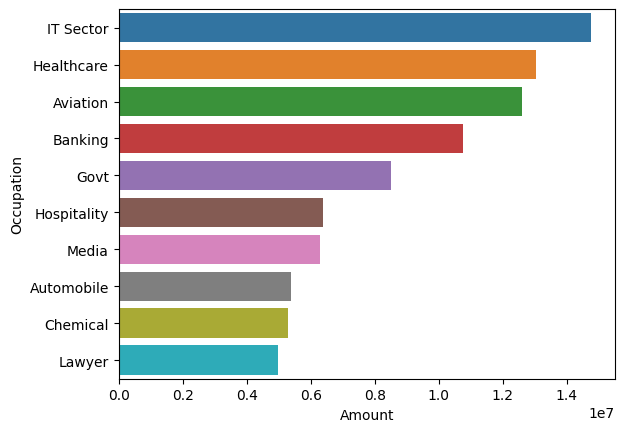

In [91]:
Table = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
sns.barplot(x='Amount',y='Occupation',data=Table)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Product_Category wise Data Analysis

In [93]:
df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


<AxesSubplot: xlabel='Amount', ylabel='Product_Category'>

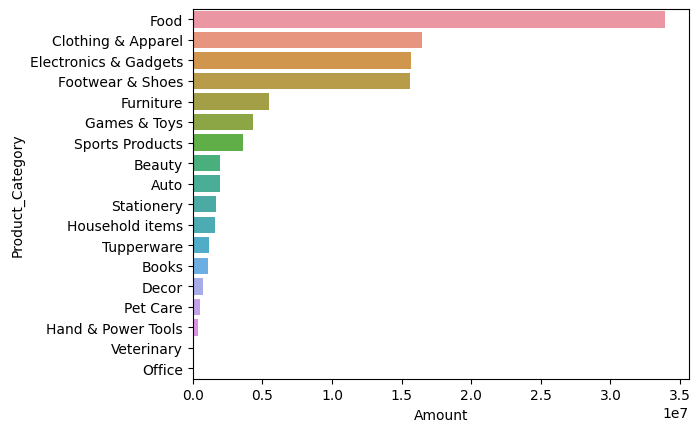

In [104]:
table = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(y='Product_Category',x='Amount',data = table)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

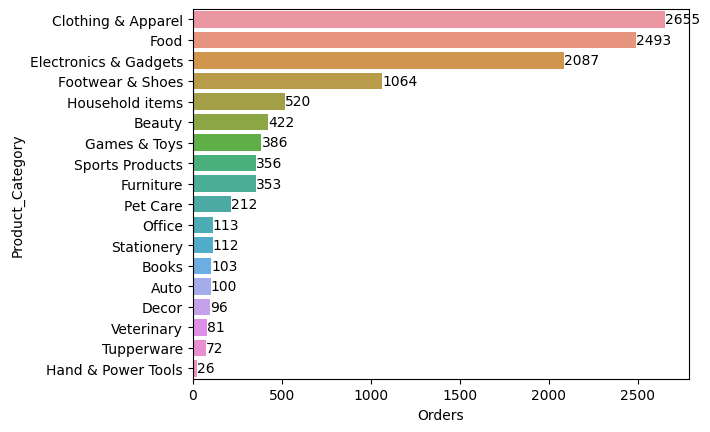

In [109]:
table = df.groupby(['Product_Category'],as_index=False)['Orders'].count().sort_values(by='Orders',ascending = False)
ax = sns.barplot(y='Product_Category',x='Orders',data = table)
for values in  ax.containers:
    ax.bar_label(values)

*From above graphs we can see that most of the ordered products are from Clothing, Food and Electronics category*

# Conclusion:

### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category